In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy.stats import semicircular


In [3]:

def marchenko_pastur_density(x, alpha):
    """Compute Marchenko-Pastur density for given x and alpha."""
    b = (1 + np.sqrt(alpha))**2
    a = (1 - np.sqrt(alpha))**2
    return (1 / (2 * np.pi * alpha * x)) * np.sqrt((b - x) * (x - a)) * (x >= a) * (x <= b)

# Part (a): Generate covariance matrices and plot eigenvalue histograms
def plot_eigenvalue_histograms(d, n_values):
    plt.figure(figsize=(10, 6))
    for n in n_values:
        X = np.random.randn(d, n) / np.sqrt(n)  # Standard normal scaled
        Sigma = X @ X.T
        eigvals = eigh(Sigma, eigvals_only=True)
        
        alpha = d / n
        x_range = np.linspace(0, (1 + np.sqrt(alpha))**2, 1000)
        density = marchenko_pastur_density(x_range, alpha)
        
        plt.hist(eigvals, bins=50, density=True, alpha=0.5, label=f'eigenvals n={n}')
        plt.plot(x_range, density, '--', label=f'MP Density (n={n})')
    
    plt.xlabel('Eigenvalue')
    plt.ylabel('Density')
    plt.title('Eigenvalue Histogram vs Marchenko-Pastur Density')
    plt.legend()
    plt.show()

# Part (b): Compute ||Σ_n - I||_op for different n
def plot_operator_norm_difference(d, n_values):
    errors = []
    for n in n_values:
        X = np.random.randn(d, n) / np.sqrt(n)
        Sigma = X @ X.T
        error = np.linalg.norm(Sigma - np.eye(d), ord=2)  # Operator norm
        errors.append(error)
    
    plt.figure(figsize=(8, 5))
    plt.plot(n_values, errors, marker='o', linestyle='-')
    plt.xlabel('n')
    plt.ylabel(r'$\hat{e}(n) = ||\hat{\Sigma}_n - I||_{op}$')
    plt.title('Operator Norm Difference vs n')
    plt.grid()
    plt.show()

# Part (c): Compute ||Σ_n - D_k||_op for different k and n
def plot_operator_norm_dk(d, k_values, n_values):
    plt.figure(figsize=(8, 5))
    for k in k_values:
        errors = []
        D_k = np.diag([1]*k + [(1/2) * (d-k) / (d-k)] * (d-k))
        for n in n_values:
            X = np.random.multivariate_normal(mean=np.zeros(d), cov=D_k, size=n).T / np.sqrt(n)
            Sigma = X @ X.T
            error = np.linalg.norm(Sigma - D_k, ord=2)
            errors.append(error)
        plt.plot(n_values, errors, marker='o', linestyle='-', label=f'k={k}')
    
    plt.xlabel('n')
    plt.ylabel(r'$\hat{e}_k(n) = ||\hat{\Sigma}_n - D_k||_{op}$')
    plt.title('Operator Norm Difference for Structured Covariance')
    plt.legend()
    plt.grid()
    plt.show()


# Part (a)

/var/folders/g2/8c32hb914ys7s2s9v6tmlcrm0000gn/T/ipykernel_19816/2447454140.py:5: RuntimeWarning: divide by zero encountered in divide
  return (1 / (2 * np.pi * alpha * x)) * np.sqrt((b - x) * (x - a)) * (x >= a) * (x <= b)
/var/folders/g2/8c32hb914ys7s2s9v6tmlcrm0000gn/T/ipykernel_19816/2447454140.py:5: RuntimeWarning: invalid value encountered in sqrt
  return (1 / (2 * np.pi * alpha * x)) * np.sqrt((b - x) * (x - a)) * (x >= a) * (x <= b)


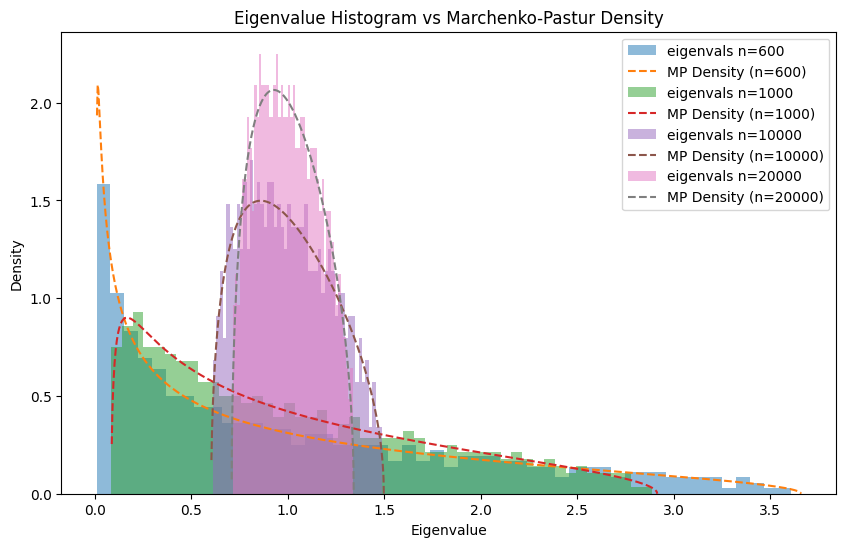

In [5]:
# Run all parts
d = 500
n_values_a = [600, 1000, 10000, 20000]
plot_eigenvalue_histograms(d, n_values_a)




# Part (b)

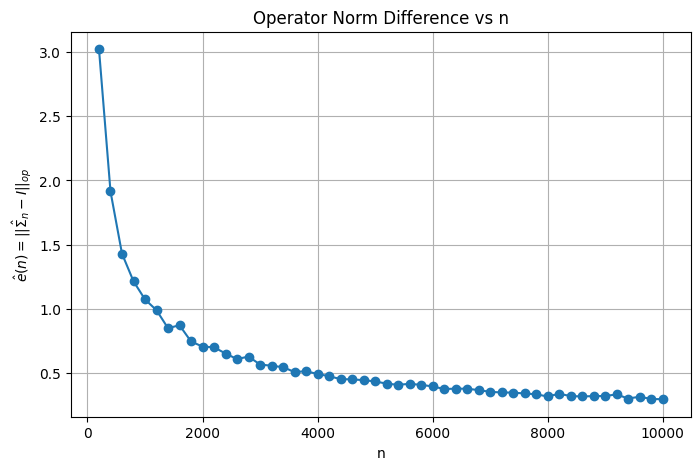

In [6]:

d = 200
n_values_b = np.arange(200, 10200, 200)
plot_operator_norm_difference(d, n_values_b)


# Part (c)

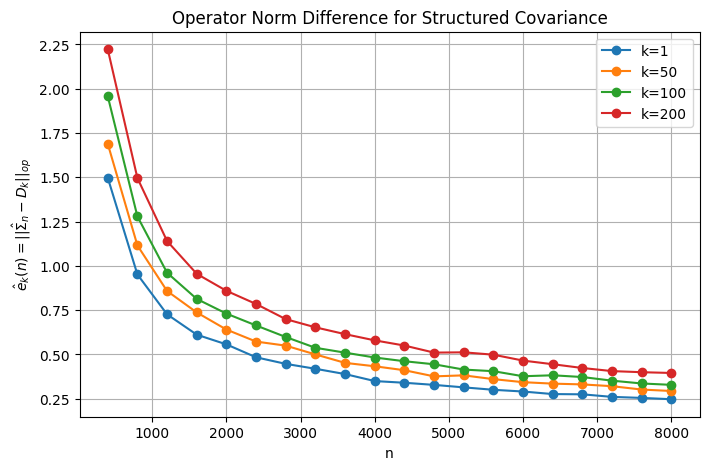

In [7]:

d = 400
k_values_c = [1, 50, 100, 200]
n_values_c = np.arange(400, 8400, 400)
plot_operator_norm_dk(d, k_values_c, n_values_c)


We observe that while the rates remain indistinguishable, a lower $k$ results in a better constant. Intuitively, reducing $k$ decreases the effective number of dimensions, leading to an improved constant for $\sqrt{d/n}$.

Whatever this concept of "effective dimension" may be, it cannot depend solely on the trace and operator norm, as those remain constant. If we assume that the relevant definition is given by:

$$
d_{\text{eff}}(\Sigma) = \frac{d}{\|\lambda(\Sigma)\|_1} f(\lambda(\Sigma))
$$

the experiment suggests that $f$ is strictly convex over $\mathbb{R}_+^d$. Possible choices for $f$ include norms such as $\|x\|_k$ or functions like $\log \sum_{i=1}^{n} e^{\theta x_i}$, both of which converge to a limit for large $k$ or $\theta$. Specifically, they approach:

$$
\max x \sum_{i=1}^{d} 1\{x_i = \max x\}
$$

which corresponds to the operator norm in the absence of ties.

Additionally, we note that attempting to apply Corollary 39.4 from the lecture notes does not provide further insights for the same reason.


### 6(g)

In [8]:

import scipy.linalg

A = np.array([[2, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])

B = np.array([[2, 0, -2],
              [0, 1, 0],
              [-2, 0, 1]])

C = np.array([[1, 0, 1],
              [0, 1, 0],
              [1, 0, 2]])

lhs_matrix = A + B + C
T1 = np.trace(scipy.linalg.expm(lhs_matrix))
T2 = np.trace(scipy.linalg.expm(A) @ scipy.linalg.expm(B) @ scipy.linalg.expm(C))

print("Tr(exp(A+B+C)) =", T1)
print("Tr(exp(A) exp(B) exp(C)) =", T2)
print("Difference (T1 - T2) =", T1 - T2)

Tr(exp(A+B+C)) = 324.8616225402519
Tr(exp(A) exp(B) exp(C)) = 265.9650767893353
Difference (T1 - T2) = 58.89654575091663
